#Procesamiento y Análisis de Imagenes Digitales

## IMPORTANTE:

Antes de comenzar con el taller es importante que sepan algunos conceptos básicos de programación con Python. Como este curso **no es para que aprendan a programar**, ustedes encontrarán en su carpeta de taller 1 un cuadernillo llamado `Introduccion_a_Python_BIO266E.ipynb`, el cual contiene una muy muy breve introducción a ciertos conceptos que serán útiles para estos talleres.

***Es altamente recomendable que vea el cuadernillo de introducción antes de adentrarse en el Taller 1!***

## ¿Qué es una imagen digital?

Una imagen se puede definir como una *funcion bi-dimensional* $f(x, y)$, donde $x$ e $y$ se denominan las coordinadas del *espacio*, y la amplitud $f$ en un par de coordenadas determinadas se denomina *intensidad* de la imagen en dichas coordenadas. Una imagen se denomina **imagen digital** cuando $x$, $y$ y los valores de intensidad tienen valores finitos y discretos (no son números como $\pi$ o $\phi$).

Una imagen digital entonces se encuentra compuesta por un *número finito de elementos*, cada uno de los cuales tiene una coordenada determinada $(x, y)$ y un valor de intensidad $f$ determinado. Estos elementos se denominan *picture elements* o ***pixeles***.

**Estos pixeles son los que nos entregan datos acerca de nuestros experimentos**, sin embargo, la mayor parte del tiempo solamente nos interesa un subconjunto de pixeles de una determinada imagen, no la imagen completa. Debido a esto las imagenes deben ser **procesadas** y **analizadas** computacionalmente (para extraer información cuantitativa de determinados experimentos) utilizando algoritmos de procesamiento de imagenes digitales, los cuales se encargan de *procesar y extraer atributos de interés de imagenes digitales*.

![Imagen](https://raw.githubusercontent.com/AlejoArav/testing_binder/master/obtencio_imagen_digital.jpg)

Imagen obtenida de Gonzalez, R. C., & Woods, R. E. (2017). Digital image processing.

## Profundidad de bits

Cuando se obtiene una imagen y esta se convierte en una imagen digital, cada unidad de información (pixel) obtenida debe ser asignada un valor. Pero cómo se asignan estos valores si deben ser un rango finito? Cómo se determina dicho rango?

Este proceso se lleva a cabo por el dispositivo digitalizador, el cual asgina un valor de intensidad según su configuración de **profundidad de bits**. *La profundidad de bits, hace referencia a la* ***cantidad de bits utilizados para representar todos los fotones captados por una camara en particular***.

Para el siguiente ejemplo será bueno explicar que *cada bit puede tomar solamente dos valores (0 o 1)*. Entonces, si el digitalizador tiene una profundidad de **1 bit**, solamente podrá asignar dos valores ($2^{1}$). En cambio un digitalizador con una profundidad de **4 bits** podrá asignar un total de *16 valores* ($2^{4}$).

Para entender estos conceptos utilizando ejemplos más cercanos a ustedes vamos a considerar las cámaras digitales comerciales y aquellas encontradas en la mayoría de los celulares. Por defecto, las cámaras comerciales y de celular permiten obtener fotos de una profundidad de **8 bits**, y por lo tanto cada pixel puede tomar valores entre $0$ y $256$ ($2^{8}$). Esto se realiza para cada canal de color (veremos esto a continuación) y la imagen se guarda en un archivo `.jpg` o `.jpeg`. Sin embargo, muchas camaras hoy en día permiten guardar archivos que se conocen como archivos `.raw` o lossless, los cuales permiten obtener imagenes digitales con una profundidad de bits que varía entre **10 a 16 bits** (es decir, a 16 bits cada pixel podrá tomar un valor entre ... ¡0 y 65.536!). Algunos sensores de digitalizadores de microscopios de alta gama permiten obtener imagenes en escala de grises con una profundidad de 12, 14 o 16 bits.

**A modo de conclusión, la profundidad de bits de un digitalizador detereminará el rango de información útil que será posible extraer de las cámaras, y la elección de un digitalizador dependerá de el tipo de imagen a obtener**.

![Imagen](https://raw.githubusercontent.com/AlejoArav/testing_binder/master/bitdepth_olymp.jpg)

Imagen obtenida de [Olympus Microscopy](https://www.olympus-lifescience.com/es/microscope-resource/primer/digitalimaging/digitalimagebasics/).

## Color

Para concluir esta sección teórica hablaremos un poco de cómo se obtienen las imagenes digitales a color. Toda la teoría expuesta anteriormente permite generar una imagen **en escala de grises**. Cómo es posible entonces generar imagenes a color? Para poder generar estas imagenes, los sensores de las cámaras deben contar con *filtros de absorción de color rojo, verde y azul*. Dos de los filtros más utilizados en la actualidad son los filtros **Bayer** y los filtros **PenTile**, el primero utilizado generalmente en sensores de camaras digitales y el segundo en pantallas de tipo OLED y LCD (probablemente como aquella en la que se encuentran leyendo esto).

Estos sensores obtienen la información de luz de cada **canal de color** por separado, y luego los combinan para generar una imagen ***RGB*** (**R**ed **G**reen **B**lue). Si cada canal de color posee una profundidad de 8 bits, y tenemos 3 canales, combinandolos obtendremos una imagen de $8 \cdot 3 = 24$ bits. Esto es lo que se denomina **color verdadero** y la gran mayoría de las pantallas e imagenes a color tienen esta profundidad de bits, la cual permite generar $2^{24} = 16.777.216$ combinaciones de colores posibles. A modo de comparación, el ojo humano puede discernir hasta aproximadamente 10 millones de colores.

## Software utilizado para procesar imagenes digitales

Habiendo introducido de manera resumida (muy resumida) las bases teóricas para el procesamiento de imagenes digitales procedemos a la práctica: qué hacer con un archivo digital y cómo procesarlo.

Existen muchas herramientas que permiten realizar procesamiento de imagenes en Python, algunas de los cuales se muestran a continuación:

* [scikit-image](https://scikit-image.org/) - Librería que contiene una colección de algoritmos desarrollados para el procesamiento y análisis de imagenes digitales.
* [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html) - Subconjunto de algoritmos de procesamiento de imagenes de la libreria SciPy (**Sci**entific **Py**thon).
* [Open CV](https://opencv.org/) - Librería enfocada en algoritmos de computer vision y machine learning.
* [Insight Segmentation and Registration Toolkit](https://itk.org/) - Librería enfocada en el procesamiento y análisis de imagenes médicas (MRI, CT)
* [Fiji](https://fiji.sc/) y [ImageJ](https://imagej.net/develop/) - Aplicaciones con una interfaz gráfica utilizadas en el procesamiento y análisis de imagenes (es posible programar en ellas, pero solamente soportan código en Jython)

Para realizar los análisis que requieran procesamiento de imagenes utilizaremos la librería de `scikit-image`, y, si fuese necesario, la librería `scipy.ndimage`.

## Carga y visualización de imagenes digitales

Habiendo introducido los conceptos básicos de procesamiento de imagenes, pasaremos a la carga y visualización de imagenes. Para esto, en primer lugar debemos dar acceso a Colab a nuestro Google Drive, para así poder acceder a nuestros archivos. Al ejecutar la celda de abajo se mostrará un link que debe seguir, en el cual se le preguntará si quiere darle acceso a Google Colab para que acceda a los archivos de Google Drive. Además, se cambiará el directorio de trabajo a nuestra carpeta de LAMP para que todo el trabajo que realice quede guardado allí.

env: HV_DOC_HTML=true


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
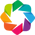

In [1]:
# Modulos estandar
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import glob
import pandas as pd

# For plotting
import bokeh.io
import bokeh.application
import bokeh.application.handlers
import bokeh.layouts
import bokeh.models
import bokeh.palettes
import bokeh.plotting

# For image processing
import cv2
import skimage.io as io
import skimage.exposure as exposure
import skimage.measure as measure
import skimage.color as color
import skimage.morphology as morph
import skimage.filters as filters
import skimage.segmentation as segmentation
import skimage.feature as feature
import scipy.signal as sig
import scipy.ndimage as ndi

# For interactive plots
import bokeh.models as models
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# For correct visualization of plots the command
# hv.extension('bokeh') must go in each cell where
# we call a bokeh object

%env HV_DOC_HTML=true
import holoviews as hv
from holoviews import opts
hv.extension("bokeh")
bokeh.io.output_notebook()

In [12]:
!wget https://raw.githubusercontent.com/AlejoArav/BIO266E/master/imgs/LAMP_GMO.jpeg

--2023-10-11 15:49:07--  https://raw.githubusercontent.com/AlejoArav/BIO266E/master/imgs/LAMP_GMO.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67515 (66K) [image/jpeg]
Saving to: ‘LAMP_GMO.jpeg.1’

LAMP_GMO.jpeg.1     100%[===================>]  65.93K  --.-KB/s    in 0.01s   

2023-10-11 15:49:07 (5.71 MB/s) - ‘LAMP_GMO.jpeg.1’ saved [67515/67515]



Para cargar la imagen utilizaremos la función `skimage.io.imread()`, la cual cargará la imagen en una estructura denominada **arreglo** (`numpy.array`), similar a una matriz matemática. *Cada entrada de nuestro arreglo corresponde a un valor de intensidad de pixel*. Es de importancia también mencionar cómo es la estructura general de nuestra imagen:

* Nuestro arreglo tendra **3 dimensiones**, $N$, $M$ y $D$, y su representación es $N \times M \times D$. Esto se puede leer como: "Mi arreglo tiene $N$ filas, $M$ columnas y tiene una dimensión de profundidad $D$".
* En el caso de una imagen, $N$ representará **el número de pixeles en el eje Y**, $M$ **el número de pixeles en el eje X** y $D$ **la cantidad de canales de color**.

Si esto se hace dificil de entender, carguemos y visualicemos una de nuestras imagenes.

In [13]:
# Cargamos la imagen en un arreglo
imagen = cv2.imread("/content/LAMP_GMO.jpeg")
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Mostraremos algunos datos de nuestra imagen
print(
    "Nuestra imagen posee:\n\n{} pixeles en Y (alto; filas)\n{} pixeles en X (ancho; columnas)\n{} canales de color (profundidad)\n".format(
        imagen.shape[0], imagen.shape[1], imagen.shape[2]
    )
)

Nuestra imagen posee:

960 pixeles en Y (alto; filas)
1280 pixeles en X (ancho; columnas)
3 canales de color (profundidad)



In [14]:
# Ejemplo:

# Accedamos a una de las filas de la imagen.
# El código de abajo se lee:
# "Muestrame la primera fila (0), todas las columnas (:), y todos los canales de color (:)"
print(imagen[0, :, :])
print("La forma del area seleccionada es de:", imagen[0, :, :].shape)

[[  8   8 106]
 [  8   8 106]
 [  8   8 106]
 ...
 [  7   6  64]
 [  7   6  64]
 [  7   6  64]]
La forma del area seleccionada es de: (1280, 3)


In [15]:
# Podemos verificar que en realidad corresponde a una fila completa verificando que el
# tamaño de este arreglo sea igual a la dimension en X de nuestra imagen original
print("Es realmente una fila?: {}".format(imagen[0, :, :].shape[0] == imagen.shape[1]))

Es realmente una fila?: True


In [16]:
# Ejercicio
# Imprima todas las filas, las columnas 5 a 10 (inclusive) y todos los canales de color de su imagen
# TIP: Los dos puntos (:) entre dos numeros pueden leerse como "n1 HASTA n2" (pero no incluye a n2)
print(imagen[:, 4:10, :])
print(imagen[:, 4:10, :].shape)

[[[  8   8 108]
  [  8   8 108]
  [  8   8 108]
  [  8   8 108]
  [  8   8 108]
  [  8   8 108]]

 [[  8   8 108]
  [  8   8 108]
  [  8   8 108]
  [  8   8 108]
  [  8   8 108]
  [  8   8 108]]

 [[  8   8 108]
  [  8   8 108]
  [  8   8 108]
  [  8   8 108]
  [  8   8 108]
  [  8   8 108]]

 ...

 [[  5   8  89]
  [  5   8  89]
  [  5   8  89]
  [  5   8  89]
  [  5   8  89]
  [  5   8  89]]

 [[  5   8  89]
  [  5   8  89]
  [  5   8  89]
  [  5   8  89]
  [  5   8  89]
  [  5   8  89]]

 [[  5   8  89]
  [  5   8  89]
  [  5   8  89]
  [  5   8  89]
  [  5   8  89]
  [  5   8  89]]]
(960, 6, 3)


In [17]:
# Ejercicio
# Busque el valor del canal rojo en el pixel x=500 e y=600
# El orden de los canales es R, G, B y sus índices 0, 1, 2
imagen[499, 599, 0]

80

Notemos que arriba, nuestra imagen nos dice al final `dtype=uint8`. Recordando la profundidad de bits, esto significa que es un arreglo donde cada elemento se encuentra compuesto por **enteros de 8 bits**. Pero ojo, debido a que es una imagen a color, en realidad tenemos **3 canales** y por tanto una profundidad completa de **24 bits**.

A continuación veremos una representación gráfica de nuestra imagen cargada.

In [18]:
#@title Variables necesarias para visualizar las imagenes { display-mode: "form" }
#@markdown Vamos a guardar las dimensiones X e Y de nuestra imagen y definir un par de variables más que nos serviran más adelante cuando visualicemos las imágenes
#@markdown estas quedaran guardadas en las siguientes variables:

#@markdown - `altura_img`: Altura original de la imagen (ídem al numero de filas)
#@markdown - `ancho_img`: Ancho original de la imagen (ídem al número de columnas)
#@markdown - `bounds`: Define los valores mínimos y máximos en X e Y
#@markdown - `altura_fig`: Altura fija de la imagen para una mejor visualización en los gráficos interactivos
#@markdown - `ancho_fig`: Ancho escalado para una mejor visualización de la figura en los gráficos interactivos

# Guardamos los bordes de nuestra imagen (límites para la visualización)
altura_img, ancho_img = imagen.shape[0], imagen.shape[1]
bounds = [0, 0, ancho_img, altura_img]

# Estas variables nos serviran para la visualización
# Son bienvenides a cambiar la altura_fig (ancho_fig depende de altura_fig)
# pero tengan cuidado con poner valores muy altos o muy pequeños (entre 300-800 está bien)
altura_fig = 600
ancho_fig = int(ancho_img / altura_img * altura_fig) - 25

In [21]:
import skimage.transform as transform
import skimage.io as io
hv.extension("bokeh")
# Utilizamos la funcion de holoviews RGB para visualizar imagenes
# con canales de color RGB (Red ,Green, Blue).

nombre_imagen = "/content/LAMP_GMO.jpeg"
imagen = io.imread(nombre_imagen)
imagen = transform.resize(imagen, (imagen.shape[0] // 2, imagen.shape[1] // 2),
                       anti_aliasing=True, preserve_range=True).astype(int)

imagen_cargada = hv.RGB(imagen, bounds=bounds).opts(
    title="Imagen Cargada", xlabel="Pixeles en X", ylabel="Pixeles en Y",
)

rgb_vals = hv.Image(imagen_cargada, ["x", "y"], ["r", "g", "b"], bounds=bounds).opts(
    alpha=0, tools=["hover"]
)

imagen_final = (imagen_cargada * rgb_vals).opts(width=ancho_fig, height=altura_fig, toolbar="right")

# Llamamos al objeto para visualizarlo
imagen_final

Output hidden; open in https://colab.research.google.com to view.

Podemos observar que nuestra imagen fue cargada correctamente, sin embargo, **en caso de que su imagen se encuentre rotada** podemos rotarla para que quede en una posición en la cual sea más fácil el análisis cualitativo. Debemos tener en cuenta que esto lo realizamos únicamente para que nostros apreciemos de mejor manera nuestra imagen, ya que en términos computacionales la imagen no importa en que rotación se encuentre siempre será la misma información.

In [22]:
#@title Rotación de imagen { run: "auto", display-mode: "form" }
#@markdown Para rotar la imagen por favor seleccione un ángulo de rotación de la barra inferior. Tenga en cuenta que los angulos de rotacion corresponden a múltiplos de 90º, por lo que le solicitamos favor obtener una imagen lo más recta posible de sus tubos.
#@markdown **La rotación se realiza** ***en contra de las manillas del reloj (counterclockwise)***.

angulo_rot = "90" #@param [0, 90, 180, 270] {type:"string"}

#@markdown **En caso de no necesitar rotación, elija 0°**

# Rotacion de la imagen
hv.extension('bokeh')
a_rotar = io.imread(nombre_imagen)
a_rotar = transform.resize(a_rotar, (a_rotar.shape[0] // 2, a_rotar.shape[1] // 2),
                       anti_aliasing=True, preserve_range=True).astype(int)
imagen_rotada = np.rot90(a_rotar, k=int(angulo_rot)//90, axes=(0, 1))

# Guardamos los bordes de nuestra imagen (límites para la visualización)
altura_img, ancho_img = imagen_rotada.shape[0], imagen_rotada.shape[1]
bounds = [0, 0, ancho_img, altura_img]

# Estas variables nos serviran para la visualización
altura_fig = 600
ancho_fig = int(ancho_img / altura_img * altura_fig) - 25

imagen_cargada = hv.RGB(imagen_rotada, bounds=bounds).opts(
    title="Imagen Cargada",
    xlabel="Pixeles en X",
    ylabel="Pixeles en Y",
    )

rgb_vals = hv.Image(imagen_cargada, ["x", "y"], ["r", "g", "b"], bounds=bounds).opts(
    alpha=0, tools=["hover"]
    )

imagen_rot = (imagen_cargada * rgb_vals).opts(width=ancho_fig, height=altura_fig, toolbar="right")
# Llamamos al objeto para visualizarlo
imagen_rot

Output hidden; open in https://colab.research.google.com to view.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
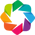

:Overlay
   .RGB.I   :RGB   [x,y]   (R,G,B)
   .Image.I :Image   [x,y]   (r,g,b)

In [23]:
#@title Recorte del área de interés {display-mode: "form"}
hv.extension('bokeh')
#@markdown Para que el procesamiento de datos sea más fácil, recortaremos nuestra área de interés, para esto debe fijarse en su imagen rotada que obtuvo en la celda anterior.
#@markdown Deberá obtener 4 parámetros que serán utilizados para recortar la imagen:
#@markdown - **X1**: Desde este valor en X comenzará su imagen
#@markdown - **X2**: Hasta este valor en X llegará su imagen
#@markdown - **Y1**: Desde este valor en Y comenzará su imagen
#@markdown - **Y2**: Hasta este valor en Y llegará su imagen

X1 =  90#@param {type:"integer"}
X2 =  550#@param {type:"integer"}
Y1 =  200#@param {type:"integer"}
Y2 =  300#@param {type:"integer"}

#@markdown Si quiere proceder sin recortar su imagen, deje ***todos*** los valores igual a `0`. Además de recortar su imagen, esta celda de código
#@markdown aplicará un filtro para **eliminar el background** de su imagen. Quedará como tarea para usted explicar el por qué es de importancia
#@markdown eliminar el background cuando se desean realizar estudios cuantitativos a partir de imagenes.

# Recorte y sustracción de background
if X1 == 0 and X2 == 0 and Y1 == 0 and Y2 == 0:
    img_final = imagen_rotada
    img_final = abs(img_final - filters.gaussian(img_final, sigma=50, channel_axis=-1, preserve_range=True).astype(int))
    # Guardamos los bordes de nuestra imagen (límites para la visualización)
    altura_img, ancho_img = img_final.shape[0], img_final.shape[1]
    bounds = [0, 0, ancho_img, altura_img]
    # Estas variables nos serviran para la visualización
    altura_fig = 600
    ancho_fig = int(ancho_img / altura_img * altura_fig) - 25
else:
    img_final = imagen_rotada[imagen_rotada.shape[0]-Y2:imagen_rotada.shape[0]-Y1, X1:X2, :]
    #img_final = imagen_rotada[Y1:Y2, X1:X2, :]
    img_final = abs(img_final - filters.gaussian(img_final, sigma=100, channel_axis=-1, preserve_range=True).astype(int))
    # Guardamos los bordes de nuestra imagen (límites para la visualización)
    altura_img, ancho_img = img_final.shape[0], img_final.shape[1]
    bounds = [0, 0, ancho_img, altura_img]
    # Estas variables nos serviran para la visualización
    altura_fig = img_final.shape[0]*2
    if altura_fig <= 100:
        altura_fig += 100
    ancho_fig = img_final.shape[1]

# Objeto holoviews
imagen_recortada = hv.RGB(img_final, bounds=bounds).opts(
    title="Área de interés de la imagen original",
    xlabel="Pixeles en X",
    ylabel="Pixeles en Y",
    )

rgb_vals = hv.Image(imagen_recortada, ["x", "y"], ["r", "g", "b"], bounds=bounds).opts(
    alpha=0, tools=["hover"]
    )

imagen_final = (imagen_recortada * rgb_vals).opts(width=ancho_fig, height=altura_fig, toolbar="right")
# Llamamos al objeto para visualizarlo
imagen_final

**Importante**: Su imagen rotada y recortada quedará guardada como una variable llamada `img_final` (por si necesita acceder a ella más adelante)

## Histogramas

Perfecto, ahora se pueden observar los detalles que nos interesan (los tubos fluorescentes), pero aun no tenemos información cuantitativa de la intensidad de los tubos. Antes de comenzar a procesar una imagen, siempre es buena idea visualizar el **histograma** de ella, para así tener una noción de **cuántos pixeles tienen una determinada intensidad**. Debemos tener en cuenta que, debido a que nuestra imagen tiene 3 canales de color (Rojo, Verde y Azul), analizaremos cada uno de estos por separados y mostraremos el canal (**en color falso**) y su correspondiente histograma.

In [24]:
#@title Ejecute esta celda para definir la función que mostrará los histogramas {display-mode: "form"}
def mostrar_histogramas(imagen, bounds=bounds, width=ancho_fig, height=altura_fig):

    """Function that allows the plotting of each of R, G and B channels from an RGB color picture
       and their respective histogram.

    Args:
        imagen: Image of type numpy array or similar
                (loaded with io.imread or other similar functions).

    Returns:
        holoviews Image object type: Image type that has 3 images (one for each channel)
                                     and 3 curve graphs with shaded area denoting the histograms
                                     for each of the channels
    """

    # Obtenemos las dimensiones de la imagen
    # y además creamos los tres objetos para los canales
    r_channel = hv.Image(imagen[:, :, 0], bounds=bounds).opts(
        cmap="viridis",
        shared_axes=False,
        colorbar=True,
        title="Canal Rojo",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
        tools=["hover"]
    )
    g_channel = hv.Image(imagen[:, :, 1], bounds=bounds).opts(
        cmap="viridis",
        shared_axes=False,
        colorbar=True,
        title="Canal Verde",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
        tools=["hover"]
    )
    b_channel = hv.Image(imagen[:, :, 2], bounds=bounds).opts(
        cmap="viridis",
        shared_axes=False,
        colorbar=True,
        title="Canal Azul",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
        tools=["hover"]
    )

    # Creamos los tres histogramas
    vals_r, bins_r = exposure.histogram(imagen[:, :, 0])
    vals_g, bins_g = exposure.histogram(imagen[:, :, 1])
    vals_b, bins_b = exposure.histogram(imagen[:, :, 2])

    # Y finalmente los plots
    # OJO: Se divide por 10 el valor maximo de numero de bins, porque
    # si no no se visualiza bien el histograma (demasiados bins 0 o 255)
    r_hist = hv.Histogram((bins_r, vals_r)).opts(
        color="red",
        fill_alpha=0.3,
        ylim=(0, max(vals_r)),
        xlim=(0, 255),
        shared_axes=False,
        title="Histograma Rojo",
        xlabel="Bins",
        ylabel="Frecuencia",
        height=height,
        width=600,
        tools=["hover"]
    )
    g_hist = hv.Histogram((bins_g, vals_g)).opts(
        color="green",
        fill_alpha=0.3,
        ylim=(0, max(vals_g)),
        xlim=(0, 255),
        shared_axes=False,
        title="Histograma Verde",
        xlabel="Bins",
        ylabel="Frecuencia",
        height=height,
        width=600,
        tools=["hover"]
    )
    b_hist = hv.Histogram((bins_b, vals_b)).opts(
        color="blue",
        fill_alpha=0.3,
        ylim=(0, max(vals_b)),
        xlim=(0, 255),
        shared_axes=False,
        title="Histograma Azul",
        xlabel="Bins",
        ylabel="Frecuencia",
        height=height,
        width=600,
        tools=["hover"]
    )

    return (r_channel + r_hist + g_channel + g_hist + b_channel + b_hist).cols(2)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
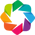

/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .Image.I       :Image   [x,y]   (z)
   .Histogram.I   :Histogram   [x]   (Frequency)
   .Image.II      :Image   [x,y]   (z)
   .Histogram.II  :Histogram   [x]   (Frequency)
   .Image.III     :Image   [x,y]   (z)
   .Histogram.III :Histogram   [x]   (Frequency)

In [25]:
# Veamos los histogramas de cada canal de color de nuestra img_final
hv.extension('bokeh')
mostrar_histogramas(img_final)

In [26]:
#@title Ejecute esta celda para definir la funcion que permitirá realizar transectos de la imagen {display-mode: "form"}
def transecto_rgb(numero_de_fila, imagen=img_final, bounds=bounds, width=ancho_fig, height=altura_fig):

    """
    Function that takes a predefined image (variable must be named img) and
    outputs the full image and the corresponding horizontal transect through
    a defined row number (numero_de_fila). Note this was intended for analizing test
    tubes and as such the image must be in a correct rotation.

    Args:
        numero_de_fila: Number of type int. Denotes the row number for the transect.

    Returns:
        holoviews Graph object: Returns a holoviews graph object that has on the
        top row the full image with the transect in a dotted line and the pixel
        values on the lower graph.
    """

    # First we obtain image parameters
    data = imagen
    pix_x = data.shape[1]  # Pixels in X
    pix_y = data.shape[0]  # Pixels in Y

    # Construct image object
    grafico_imagen = hv.RGB(data, bounds=bounds).opts(
        height=height, width=width, xlabel="Pixeles en X", ylabel="Pixeles en Y", title="Área de interés de la imagen original"
    ) * hv.HLine(numero_de_fila).opts(color="red", line_dash="dashed", line_width=1.5)

    # For the transect we must filter the noisy signal
    # For this we use the Savitzky-Golay filter (for 1D)
    filtered_sig_red = sig.savgol_filter(data[(pix_y - numero_de_fila) - 1, :, 0], 25, 5)
    filtered_sig_green = sig.savgol_filter(data[(pix_y - numero_de_fila) - 1, :, 1], 25, 5)
    filtered_sig_blue = sig.savgol_filter(data[(pix_y - numero_de_fila) - 1, :, 2], 25, 5)

    # Create curves
    red_curve = hv.Area(filtered_sig_red).opts(
        color="red",
        shared_axes=False,
        xlim=(0, pix_x),
        ylim=(0, 255),
        height=height,
        width=width,
        fill_alpha=0.3
    )
    green_curve = hv.Area(filtered_sig_green).opts(
        color="green",
        shared_axes=False,
        xlim=(0, pix_x),
        ylim=(0, 255),
        height=height,
        width=width,
        fill_alpha=0.3
    )
    blue_curve = hv.Area(filtered_sig_blue).opts(
        color="blue",
        shared_axes=False,
        xlim=(0, pix_x),
        ylim=(0, 255),
        height=height,
        width=width,
        fill_alpha=0.3
    )

    # Create transect graph with filtered signal
    grafico_transecto = hv.Overlay([red_curve, green_curve, blue_curve]).opts(
        shared_axes=False, xlim=(0, pix_x), ylim=(0, 255), height=height, width=width
    )

    return (grafico_imagen + grafico_transecto).cols(1).opts(toolbar="right")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
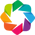

interactive(children=(IntSlider(value=0, continuous_update=False, description='Fila:'), Output()), _dom_classe…

<function __main__.update_traza(fila)>

In [27]:
# Hagamos un ipywidget slider para el numero de file que este ligado a la funcion de arriba

# Primero definimos el slider
slider_fila = widgets.IntSlider(
    value=0,
    min=0,
    max=img_final.shape[0],
    step=1,
    description="Fila:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

# Ahora definimos la función que se ejecutará cada vez que se mueva el slider
def update_traza(fila):
    return transecto_rgb(fila)

# Finalmente creamos el objeto interactivo
hv.extension('bokeh')
interact(update_traza, fila=slider_fila)

Fíjese en los **valores de intensidad** de los tubos que suponemos son positivos versus aquellos que suponemos son negativos. **Tienen alta intensidad verde y roja, pero también algo de componente azul**. Esto a diferencia de los tubos negativos, los cuales poseen componentes similares al fondo de la imagen.

Cuando se analizan imagenes RGB, es recomendable analizar la imagen por canales separados (paraleliza los procesos). Además, nuestros objetos de interés puede que no tengan componentes en algunos de los canales RGB. Por ejemplo, si esta analizando bacterias con un marcador fluorescente rojo, es probable que la intensidad en el canal azul sea cercana a 0. Para continuar con el análisis guardaremos **cada uno de los canales en variables distintas**.

In [28]:
# Vamos a guardar en variables la información de cada uno de nuestros canales
canal_rojo, canal_verde, canal_azul = img_final[:, :, 0], img_final[:, :, 1], img_final[:, :, 2]

## Filtrado de imagenes digitales

Durante la conversión de imagenes mediada por el digitalizador, es inevitable que las imagenes se conviertan junto a señales que no son propias de ellas, las cuales se denominan *ruido*. El ruido en imagenes digitales hace referencia a las variaciones aleatorias de la intensidad en los pixeles, generalemente causado por la conversión de señales análogas a digitales.

La reducción de ruido es un algoritmo fundamental en el procesamiento de imagenes, y existe una gran cantidad de algoritmos desarrollados. Debido a que nuestras imagenes son datos numéricos, se le pueden aplicar funciones, y ciertas funciones estadísticas como la media permiten reducir cierto tipo de ruido.

## Proceso de segmentación

Al ver una imagen, a los humanos se les hace realtivamente fácil distinguir entre los objetos de interés, pero lo mismo no puede decirse para los computadores. Hoy en día sin emabargo, el avance en los algoritmos ha permitido el reconocimiento de objetos/animales/personas de interés llegando a niveles comparables con el ojo humano, y todos estos algoritmos deben tener en alguna parte un paso de **segmentación**.

La segmentación corresponde a la *división de la imagen digital en múltiples grupos de pixeles (llamados objetos), y tiene como finalidad simplificar y/o cambiar la imagen original en otra imagen más fácil de analizar*. En general los algoritmos de segmentación se basan en **una de las dos propiedades básicas de los valores de intensidad en una imagen dada:** ***discontinuidad y similaridad***. A continuación veremos un ejemplo de segmentación basada en similaridad utilizando nuestra imagen rotada como molde.

In [29]:
#@title Ejecute esta celda para definir la función de filtrado gaussiano y mediano {display-mode: "form"}

# Primero filtrado básico Gaussiano y/o Mediano
def gauss_med(sigma, selem, canal_de_color, imagen=img_final, bounds=bounds, width=ancho_fig, height=altura_fig):

    # Imagenes con filtro aplicado
    gauss = filters.gaussian(imagen[:, :, canal_de_color], sigma=sigma, preserve_range=True).astype(int)
    med = filters.median(imagen[:, :, canal_de_color], np.ones((selem, selem)))

    gauss_image = hv.Image(gauss, bounds=bounds).opts(
        cmap="viridis",
        title="Imagen con filtro Gaussiano",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
        tools=["hover"]
    )

    med_image = hv.Image(med, bounds=bounds).opts(
        cmap="viridis",
        title="Imagen con filtro Median",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
        tools=["hover"]
    )

    return (gauss_image + med_image).cols(2)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
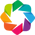

interactive(children=(IntSlider(value=0, description='Sigma:', max=10), IntSlider(value=1, description='Selem:…

<function __main__.update_filtros(sigma, selem)>

In [30]:
# Hagamos un ipywidget slider para el sigma y selem que este ligado a la funcion de arriba

# Primero definimos el slider
slider_sigma = widgets.IntSlider(
    value=0,
    min=0,
    max=10,
    step=1,
    description="Sigma:",
    disabled=False,
    continuous_update=True,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

slider_selem = widgets.IntSlider(
    value=1,
    min=1,
    max=10,
    step=1,
    description="Selem:",
    disabled=False,
    continuous_update=True,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

# Ahora definimos la función que se ejecutará cada vez que se mueva el slider
def update_filtros(sigma, selem):
    return gauss_med(sigma, selem, 0)

# Finalmente creamos el objeto interactivo
hv.extension('bokeh')
interact(update_filtros, sigma=slider_sigma, selem=slider_selem)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
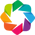

:Image   [x,y]   (z)

In [35]:
#@title Guardamos la imagen filtrada en una variable { run: "auto", display-mode: "form" }

#@markdown Para seguir la linea de procesamiento vamos a guardar la imagen filtrada con un filtro gaussiano/median. Recuerde ingresar los valores que eligio en la celda previa.
#@markdown Debe elegir un **canal de color** en donde se realizará el filtrado, un **sigma** que determinará el grado de suavizado de la imagen y un **selem** que determinará el área
#@markdown de la cual se calculará la media de intensidad. ***En caso de no querer añadir alguno de los dos filtros debe poner un `0` para anular el filtro.***

canal_de_color = "Rojo" #@param ["Rojo", "Verde", "Azul"]
sigma = 1#@param {type:"integer"}
selem = 3#@param {type:"integer"}

#@markdown Su variable quedará guardada dentro de la misma sesión como `img_filtrada` (por si necesita acceder a ella nuevamente)

#Procesamos la info del formulario
try:
    if canal_de_color.upper() == "ROJO":
        c = 0
    elif canal_de_color.upper() == "VERDE":
        c = 1
    elif canal_de_color.upper() == "AZUL":
        c = 2
except:
    print("Por favor elija un canal de color válido, las opciones que tiene son:\n- Rojo\n- Verde\n- Azul")

img_a_filtrar = img_final[:, :, c]

#Filtrado
img_filtrada = img_a_filtrar
if sigma:
    img_filtrada = filters.gaussian(img_filtrada, sigma=sigma, preserve_range=True).astype(int)
if selem:
    img_filtrada = filters.median(img_filtrada, np.ones((selem, selem)))

#Mostramos la imagen final despues del filtrado
hv.extension("bokeh")
hv.Image(img_filtrada, bounds=bounds).opts(
        cmap="viridis",
        title="Esta es su imagen filtrada",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=altura_fig,
        width=ancho_fig,
        tools=["hover"],
        toolbar="above"
    )

## Thresholding

Uno de los pasos más importantes en la línea de procesamiento de imagenes es el thresholding (segmentación). Este proceso puede pensarse como una separación de nuestros objetos de interés de el fondo/ruido de la imagen.

Para realizar esto, debemos elegir un valor que permita **diferenciar aquello que nos interesa de lo que no**. A continuación veremos un ejemplo de cómo aplicar esto a nuestra imagen.

In [36]:
#@title A continuacion realizamos un thresholding básico (a partir del filtrado realizado en la seccion anterior) {display-mode: "form"}
def thresholding_un_canal(thresh, imagen=img_filtrada, bounds=bounds, width=ancho_fig, height=altura_fig):

    img_binaria = imagen > thresh
    # Convert to uint8
    img_binaria = img_binaria.astype(np.uint8) * 255

    # Ploteamos la imagen filtrada también
    imagen_filtrada = hv.Image(imagen, bounds=bounds).opts(
        cmap="viridis",
        shared_axes=False,
        title="Imagen filtrada",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
        tools=["hover"]
    )

    # Ploteamos la imagen binaria
    imagen_binaria = hv.Image(img_binaria, bounds=bounds).opts(
        cmap="viridis",
        shared_axes=False,
        title="Imagen con threshold aplicado",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
        tools=["hover"],
    )

    return (imagen_filtrada + imagen_binaria).cols(1)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
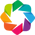

interactive(children=(IntSlider(value=5, continuous_update=False, description='Threshold:', max=255, min=1), O…

<function __main__.update_thresholding(thresh)>

In [37]:
# Hagamos un ipywidget slider para el threshold que este ligado a la funcion de arriba

# Primero definimos el slider
slider_thresh = widgets.IntSlider(
    value=5,
    min=1,
    max=255,
    step=1,
    description="Threshold:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

# Ahora definimos la función que se ejecutará cada vez que se mueva el slider
def update_thresholding(thresh):
    return thresholding_un_canal(thresh)

# Finalmente creamos el objeto interactivo
hv.extension('bokeh')
interact(update_thresholding, thresh=slider_thresh)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
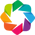

:Image   [x,y]   (z)

In [38]:
#@title Guardamos la imagen binaria en una variable { run: "auto", display-mode: "form" }

#@markdown Ahora guardaremos la imagen binaria utilizando el valor de thresholding que obtuvo en el paso anterior.
#@markdown Es importante que aunque le queden objetos pequeños en su imagen **siempre intente maximizar el area de sus tubos (o de sus objetos de interés).**

valor_thresh = 100#@param {type:"integer"}

#@markdown Su variable quedará guardada dentro de la misma sesión como `img_binaria` (por si necesita acceder a ella nuevamente)

#Procesamos la info del formulario
try:
    img_binaria = img_filtrada > valor_thresh
except:
    print("Por favor elija un entero entre 0 y 255")

#Mostramos la imagen binaria despues del thresholding
hv.extension("bokeh")
hv.Image(img_binaria, bounds=bounds).opts(
        cmap="viridis",
        title="Esta es su imagen binaria",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=altura_fig,
        width=ancho_fig,
        tools=["hover"],
        toolbar="above"
    )

## Limpieza de la imagen segmentada

Existen ocasiones en las cuales por más que se intenta eliminar el ruido de fondo de la imagen esto no es posible, por lo que pueden quedar objetos no deseados en la imagen segmentada. Esto es potencialmente problemático ya que si deseamos etiquetar nuestras bacterias/celulas/núcleos, debemos eliminar los objetos no deseados.

Para realizar esto existe lo que se denomina **procesamiento morfológico de imagenes**, que consiste en (como el nombre lo indica) procesar y modificar la morfología de una imagen segmentada.

A continuación se mostrará cómo utilizar una función que **elimina objetos pequeños no deseados** y **rellena posibles hoyos que hayan quedado al aplicar un threshold**.

In [40]:
# Calcule el tamaño (en pixeles cuadrados) del área de interés de MENOR tamaño, anote el valor
# que le aparecerá abajo

# Calcule como ALTO (Y) x ANCHO (X)
10*10

100

In [41]:
#@title A continuacion limpiaremos la imagen binaria obtenida por thresholding {display-mode: "form"}
#@markdown En caso de que no requiera procesamiento morfológico deje ambas variables como `0`

# Limpieza binaria
def limpieza_binaria(max_size_holes, min_size_objects, imagen=img_binaria, bounds=bounds, width=ancho_fig, height=altura_fig):

    # First check if user wants to fill small holes in binary image
    if max_size_holes:
        fill_holes = morph.remove_small_holes(imagen, max_size_holes)
    else:
        fill_holes = imagen

    # Then ask if user wants to remove small objects
    if min_size_objects:
        remove_objs = morph.remove_small_objects(fill_holes, min_size=min_size_objects)
    else:
        remove_objs = fill_holes

    # Now plots
    # Ploteamos la imagen binaria también
    imagen_binaria = hv.Image(imagen, bounds=bounds).opts(
        cmap="viridis",
        shared_axes=False,
        title="Imagen binaria",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
        tools=["hover"]
    )

    # Ploteamos la imagen limpia
    imagen_limpia = hv.Image(remove_objs, bounds=bounds).opts(
        cmap="viridis",
        shared_axes=False,
        title="Imagen con objetos pequeños removidos y/o vacíos cerrados",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
        tools=["hover"]
    )

    return (imagen_binaria + imagen_limpia).cols(1)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
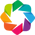

interactive(children=(IntSlider(value=0, continuous_update=False, description='Tamaño máximo de huecos:', max=…

<function __main__.update_limpieza_binaria(max_size_holes, min_size_objects)>

In [42]:
# Hagamos un ipywidget slider para el threshold que este ligado a la funcion de arriba

# Primero definimos el slider
slider_max_size_holes = widgets.IntSlider(
    value=0,
    min=0,
    max=1000,
    step=1,
    description="Tamaño máximo de huecos:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

slider_min_size_objects = widgets.IntSlider(
    value=0,
    min=0,
    max=1000,
    step=1,
    description="Tamaño mínimo de objetos:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

# Ahora definimos la función que se ejecutará cada vez que se mueva el slider
def update_limpieza_binaria(max_size_holes, min_size_objects):
    return limpieza_binaria(max_size_holes, min_size_objects)

# Finalmente creamos el objeto interactivo
hv.extension('bokeh')
interact(update_limpieza_binaria, max_size_holes=slider_max_size_holes, min_size_objects=slider_min_size_objects)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
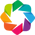

:Image   [x,y]   (z)

In [43]:
#@title Finalmente guardamos la imagen binaria limpia en una variable { run: "auto", display-mode: "form" }

#@markdown Finalmente guardaremos la imagen binaria limpia para poder utilizarla como "mascara" y obtener los valores de intensidad promedio de sus tubos.
#@markdown Al igual que en casos anteriores, en caso de que no desee aplicar un filtro en el campo el valor `0`.

max_size_holes = 0#@param {type:"integer"}
min_size_objects = 100#@param {type:"integer"}

#@markdown Su variable quedará guardada dentro de la misma sesión como `img_binaria_limpia` (por si necesita acceder a ella nuevamente)

#Procesamos la info del formulario
try:
    img_binaria_limpia = morph.remove_small_holes(img_binaria, max_size_holes)
    img_binaria_limpia = morph.remove_small_objects(img_binaria_limpia, min_size_objects)
except:
    print("Valor no válido, favor intente nuevamente")

#Mostramos la imagen binaria despues del thresholding
hv.extension("bokeh")
hv.Image(img_binaria_limpia, bounds=bounds).opts(
        cmap="viridis",
        title="Esta es su imagen binaria limpia que será utilizada como máscara",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=altura_fig,
        width=ancho_fig,
        tools=["hover"],
        toolbar="above"
    )

## Calculo de propiedades de objetos

Luego de este largo camino, podemos **etiquetar la imagen binaria**, para de esta forma obtener un valor que describa cada región detectada en la imagen.

Para obtener el promedio de intensidad de nuestros objetos debemos multiplicar la imagen binaria limpia con cada uno de los canales R, G y B de nuestra imagen original (`img_final`). Luego, debemos sumar los valores dentro del área y dividir por el tamaño del área (en pixeles).

**Este cálculo nos arrojará la intensidad promedio de cada uno de nuestros tubos en unidades arbitrarias**. Además las siguientes celdas le guardarán una copia de las intensidades promedio calculadas en esta carpeta de Google Drive (Taller 1).

In [44]:
#@title Ejecute esta celda para definir las funciones que calcularan la intensidad promedio de sus objetos {display-mode: "form"}
def calcular_intensidades(imagen=img_binaria_limpia, bounds=bounds, width=ancho_fig, height=altura_fig):

    # Label the detected objects and calculate some properties
    labeled, num_objetos = ndi.label(np.rot90(imagen, 3))
    labeled = np.rot90(labeled, 1)
    regions = measure.regionprops(labeled)

    intensidades = {}

    # Calculate for each tube detected their mean intensity
    for i in range(num_objetos):

        intensidad_promedio_r = np.round(np.sum((labeled == i+1)*img_final[:, :, 0])/regions[i].area, 3)
        intensidad_promedio_g = np.round(np.sum((labeled == i+1)*img_final[:, :, 1])/regions[i].area, 3)
        intensidad_promedio_b = np.round(np.sum((labeled == i+1)*img_final[:, :, 2])/regions[i].area, 3)

        intensidades["Tubo {}".format(i+1)] = [intensidad_promedio_r, intensidad_promedio_g, intensidad_promedio_b]

    return intensidades

def mostrar_objetos(num_obj, imagen=img_binaria_limpia, bounds=bounds, width=ancho_fig, height=altura_fig):

    # Label the detected objects and calculate some properties
    labeled, num_objetos = ndi.label(np.rot90(imagen, 3))
    labeled = np.rot90(labeled, 1)
    regions = measure.regionprops(labeled)

    objetos = hv.Image(np.invert(labeled == num_obj), bounds=bounds).opts(
        alpha=0.60,
        shared_axes=True,
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width
    )

    img_original = hv.RGB(img_final, bounds=bounds).opts(
        shared_axes=True,
        title="Deteccion de objetos en imagen original",
        xlabel="Pixeles en X",
        ylabel="Pixeles en Y",
        height=height,
        width=width,
    )

    return (img_original * objetos).opts(toolbar="above")

In [45]:
# Esta celda calcula las intensidades promedio de su imagen
intensidades = calcular_intensidades()
print("Se detectaron {} tubos positivos".format(len(intensidades.keys())))
tabla_intensidades = pd.DataFrame(intensidades)
tabla_intensidades.index = ["R", "G", "B"]
tabla_intensidades

Se detectaron 4 tubos positivos


Tubo 1   Tubo 2   Tubo 3   Tubo 4
R  131.653  148.269  157.672  121.513
G  170.285  178.673  186.844  157.470
B   96.479   98.614   55.242   80.718

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
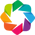

interactive(children=(IntSlider(value=1, continuous_update=False, description='Tubo:', max=4, min=1), Output()…

<function __main__.update_mostrar_objetos(num_obj)>

In [46]:
# Hagamos un ipywidget slider para el threshold que este ligado a la funcion de arriba

# Primero definimos el slider
slider_num_obj = widgets.IntSlider(
    value=1,
    min=1,
    max=len(intensidades.keys()),
    step=1,
    description="Tubo:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

# Ahora definimos la función que se ejecutará cada vez que se mueva el slider
def update_mostrar_objetos(num_obj):
    return mostrar_objetos(num_obj)

# Finalmente creamos el objeto interactivo
hv.extension('bokeh')
interact(update_mostrar_objetos, num_obj=slider_num_obj)

Y de esta forma llegamos al fin de este taller! Ojalá hayan entendido los conceptos a gran escala, **ya que deberán utilizar otro cuadernillo de Jupyter que les enviaremos posteriormente para analizar sus imagenes luego de realizar los experimentos de Cell-free y LAMP**. Cualquier comentario, duda, consulta, etc. pueden contactarme mediante correo electrónico utilizando la plataforma de Canvas. Éxito en todo y nos vemos!